In [188]:
# Problem 1: Data Loading and Initial Exploration

import pandas as pd

df = pd.read_csv('ad_10000records.csv')

df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1
...,...,...,...,...,...,...,...,...,...,...
9995,41.73,31.0,61840.26,207.17,Profound executive flexibility,West Angelabury,Male,Singapore,2016-01-03 03:22:15,1
9996,41.73,28.0,51501.38,120.49,Managed zero tolerance concept,Kennedyfurt,Male,Luxembourg,2016-05-28 12:20:15,0
9997,55.60,39.0,38067.08,124.44,Intuitive exuding service-desk,North Randy,Female,Egypt,2016-01-05 11:53:17,0
9998,46.61,50.0,43974.49,123.13,Realigned content-based leverage,North Samantha,Female,Malawi,2016-04-04 07:07:46,1


In [33]:
print("Dataset Info:")
print(df.info())

duplicate_rows = df[df.duplicated()]
print(f"\nNumber of duplicate rows: {duplicate_rows.shape[0]}")

missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values[missing_values > 0])

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       10000 non-null  float64
 2   Area Income               10000 non-null  float64
 3   Daily Internet Usage      10000 non-null  float64
 4   Ad Topic Line             10000 non-null  object 
 5   City                      10000 non-null  object 
 6   Gender                    10000 non-null  object 
 7   Country                   10000 non-null  object 
 8   Timestamp                 10000 non-null  object 
 9   Clicked on Ad             10000 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 781.4+ KB
None

Number of duplicate rows: 215

Missing Values in Each Column:
Series([], dtype: int64)


In [66]:
# Problem 2: Handling Missing and Impossible Values

import numpy as np

# Check missing values in "Age" and "Area Income"
print("Missing Values Before Imputation:")
print(df[['Age', 'Area Income']].isnull().sum())

# Impute missing values
# Using median imputation for both columns
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Area Income'] = df['Area Income'].fillna(df['Area Income'].median())

# More sophisticated method using city-based imputation for Area Income
df['Area Income'] = df.groupby('City')['Area Income'].transform(lambda x: x.fillna(x.median()))

# Verify missing values after imputation
print("\nMissing Values After Imputation:")
print(df[['Age', 'Area Income']].isnull().sum())



Missing Values Before Imputation:
Age            0
Area Income    0
dtype: int64

Missing Values After Imputation:
Age            0
Area Income    0
dtype: int64


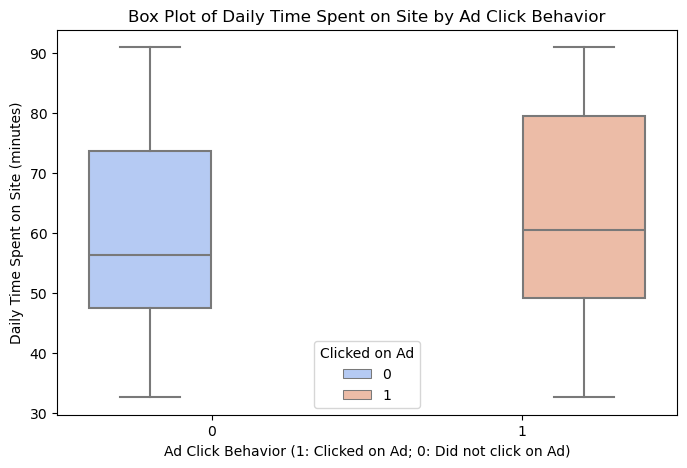

In [186]:
# Problem 3: Plotting Box Plots

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x="Clicked on Ad", y="Daily Time Spent on Site", data=df, hue="Clicked on Ad", palette="coolwarm")

plt.xlabel("Ad Click Behavior (1: Clicked on Ad; 0: Did not click on Ad)")
plt.ylabel("Daily Time Spent on Site (minutes)")
plt.title("Box Plot of Daily Time Spent on Site by Ad Click Behavior")

plt.show()

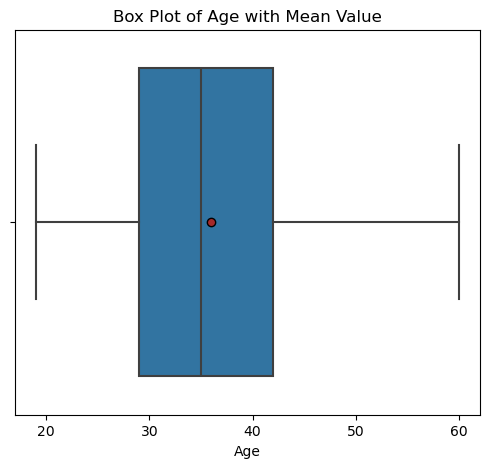

In [110]:
# Problem 4: Customizing Box Plots

plt.figure(figsize=(6, 5))
sns.boxplot(x=df["Age"], showmeans=True, meanprops={"marker":"o", "markerfacecolor":"brown", "markeredgecolor":"black"})

plt.xlabel("Age")
plt.title("Box Plot of Age with Mean Value")

plt.show()

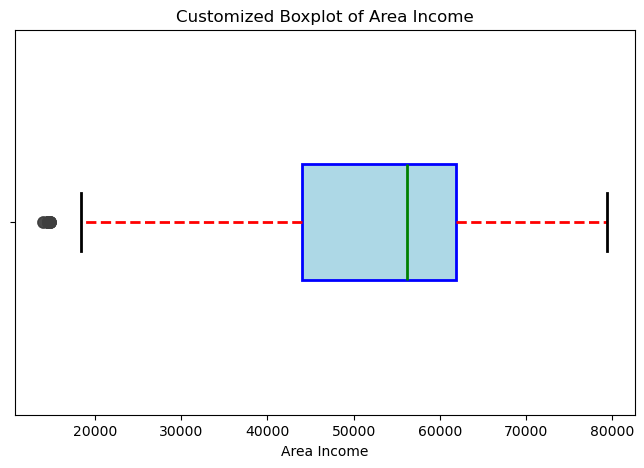

In [112]:
# Problem 5: Advanced Customizing Boxplots

plt.figure(figsize=(8, 5))
sns.boxplot(
    x=df["Area Income"],
    width=0.3,
    boxprops=dict(facecolor='lightblue', edgecolor='blue', linewidth=2),  # Box color
    whiskerprops=dict(color='red', linestyle='dashed', linewidth=2),  # Whiskers
    capprops=dict(color='black', linewidth=2),  # Caps
    flierprops=dict(marker='o', color='purple', markersize=8, alpha=0.6),  # Outliers
    medianprops=dict(color='green', linewidth=2)  # Median line
)
plt.title("Customized Boxplot of Area Income")
plt.xlabel("Area Income")
plt.show()

C:\Users\neilv\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


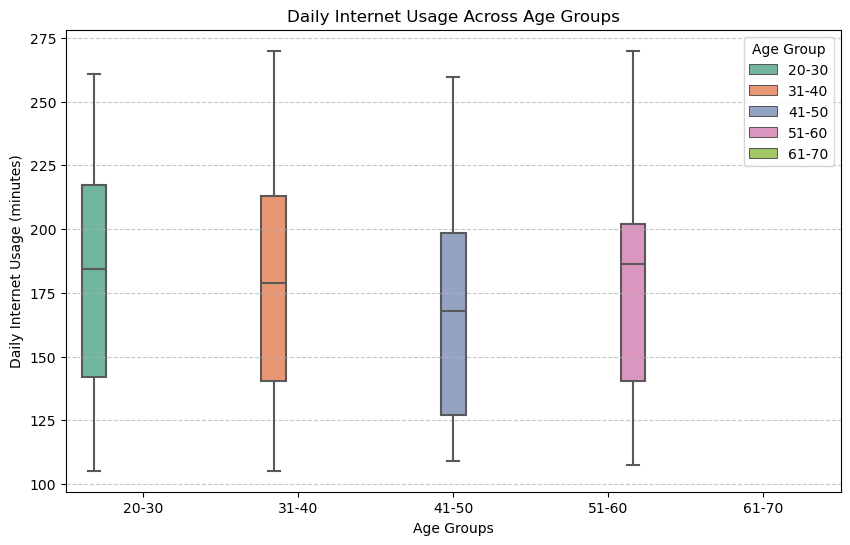

In [146]:
# Problem 6: Comparative Analysis with Side-by-Side Boxplots

bins = [20, 30, 40, 50, 60, 70]  # Age groups
labels = ["20-30", "31-40", "41-50", "51-60", "61-70"]
df["Age Group"] = pd.cut(df["Age"], bins=bins, labels=labels, right=True)

plt.figure(figsize=(10, 6))
sns.boxplot(x="Age Group", y="Daily Internet Usage", data=df, hue="Age Group", palette="Set2")

plt.title("Daily Internet Usage Across Age Groups")
plt.xlabel("Age Groups")
plt.ylabel("Daily Internet Usage (minutes)")
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()

In [116]:
# Problem 7: Effective Visualization of Large Datasets with Boxplots

Q1 = df["Daily Time Spent on Site"].quantile(0.25)
Q3 = df["Daily Time Spent on Site"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["Daily Time Spent on Site"] < lower_bound) | 
              (df["Daily Time Spent on Site"] > upper_bound)]
print(f"Number of outliers: {outliers.shape[0]}")

Number of outliers: 0


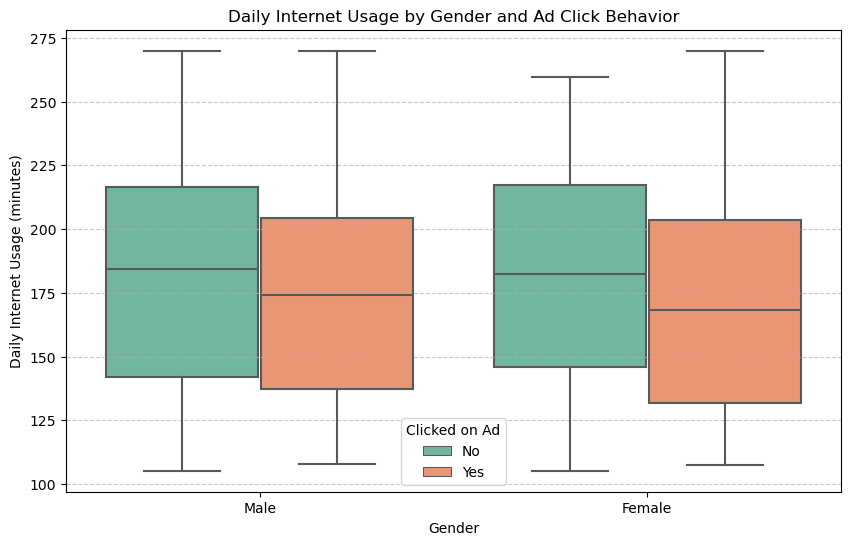

In [118]:
# Problem 8: Advanced-Data Grouping with Boxplots

df["Clicked on Ad"] = df["Clicked on Ad"].map({0: "No", 1: "Yes"})

plt.figure(figsize=(10, 6))
sns.boxplot(
    x="Gender",
    y="Daily Internet Usage",
    hue="Clicked on Ad",
    data=df,
    palette="Set2"
)

plt.title("Daily Internet Usage by Gender and Ad Click Behavior")
plt.xlabel("Gender")
plt.ylabel("Daily Internet Usage (minutes)")
plt.legend(title="Clicked on Ad")
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()

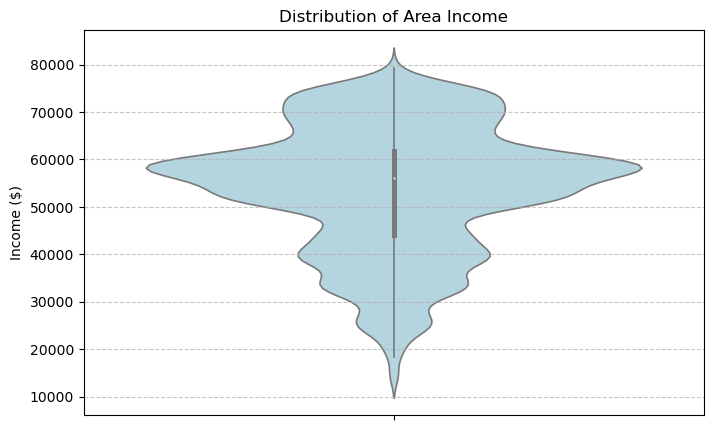

In [120]:
# Problem 9: Plotting Violin Plots

plt.figure(figsize=(8, 5))
sns.violinplot(y=df["Area Income"], color="lightblue", linewidth=1.2)

plt.title("Distribution of Area Income")
plt.ylabel("Income ($)")
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()

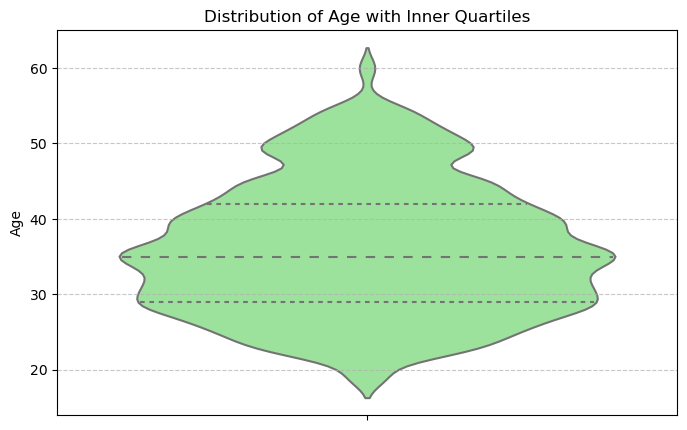

In [122]:
# Problem 10: Customizing Violin Plots

plt.figure(figsize=(8, 5))
sns.violinplot(
    y=df["Age"],
    color="lightgreen",
    linewidth=1.5,
    inner="quartile" 
)

plt.title("Distribution of Age with Inner Quartiles")
plt.ylabel("Age")
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()

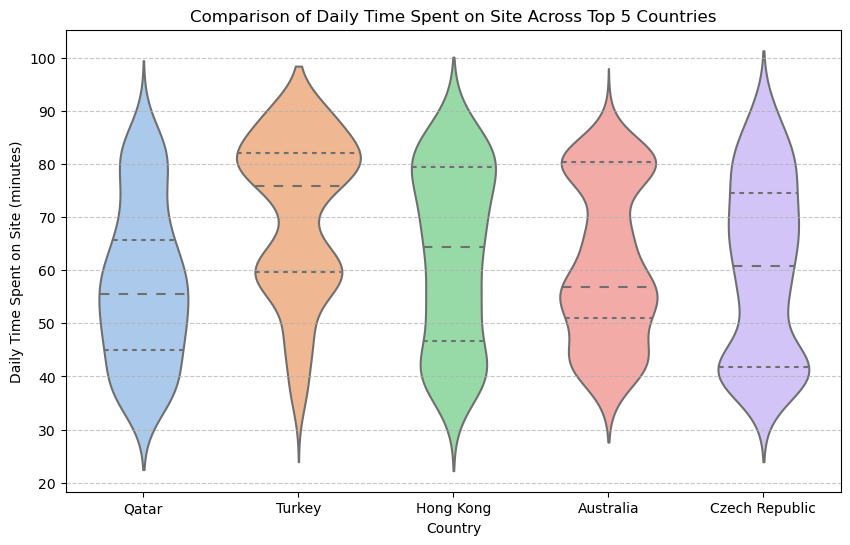

In [124]:
# Problem 11: Comparative Data Analysis with Violin Plots

top_countries = df["Country"].value_counts().nlargest(5).index

df_top_countries = df[df["Country"].isin(top_countries)]

plt.figure(figsize=(10, 6))
sns.violinplot(
    x="Country",
    y="Daily Time Spent on Site",
    data=df_top_countries,
    palette="pastel",
    inner="quartile"
)

plt.title("Comparison of Daily Time Spent on Site Across Top 5 Countries")
plt.xlabel("Country")
plt.ylabel("Daily Time Spent on Site (minutes)")
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()

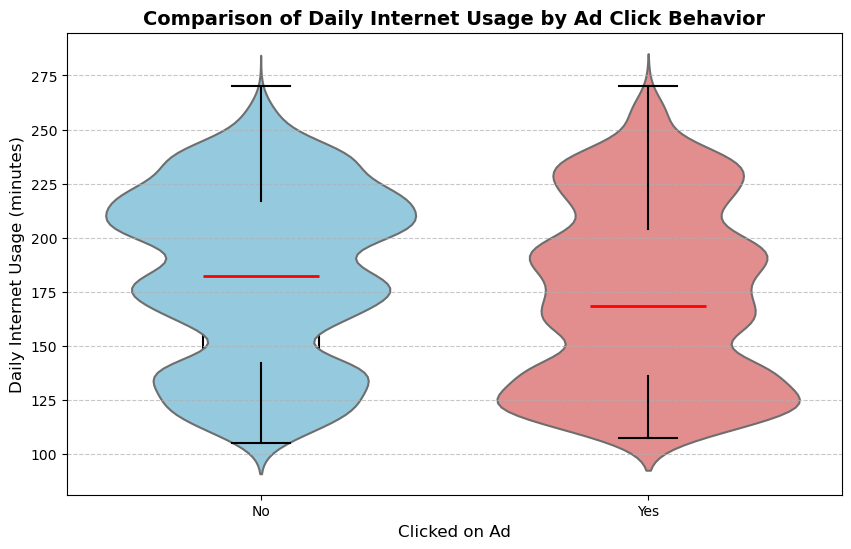

In [190]:
# Problem 12: Integrating Violin Plots with Boxplots
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df["Click Status"] = df["Clicked on Ad"].map({0: "No", 1: "Yes"})
df_clean = df.dropna(subset=["Daily Internet Usage", "Click Status"])
plt.figure(figsize=(10, 6))
sns.violinplot(
    x="Click Status",
    y="Daily Internet Usage",
    data=df_clean,
    palette=["skyblue", "lightcoral"],
    inner=None,
    alpha=0.7  
)
sns.boxplot(
    x="Click Status",
    y="Daily Internet Usage",
    data=df_clean,
    width=0.3,
    showcaps=True,
    boxprops={"facecolor": "None", "edgecolor": "black"},
    whiskerprops={"color": "black"},
    capprops={"color": "black"},
    medianprops={"color": "red", "linewidth": 2},
    showfliers=False
)
plt.title("Comparison of Daily Internet Usage by Ad Click Behavior", fontsize=14, fontweight='bold')
plt.xlabel("Clicked on Ad", fontsize=12)
plt.ylabel("Daily Internet Usage (minutes)", fontsize=12)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()

In [168]:
# Problem 13: Dividing the Dataset into Subgroups

clicked_df = df[df["Clicked on Ad"] == 1]  # Users who clicked on the ad
not_clicked_df = df[df["Clicked on Ad"] == 0]  # Users who did not click

print(f"Users who clicked on the ad: {clicked_df.shape[0]}")
print(f"Users who did not click on the ad: {not_clicked_df.shape[0]}")

Users who clicked on the ad: 4917
Users who did not click on the ad: 5083


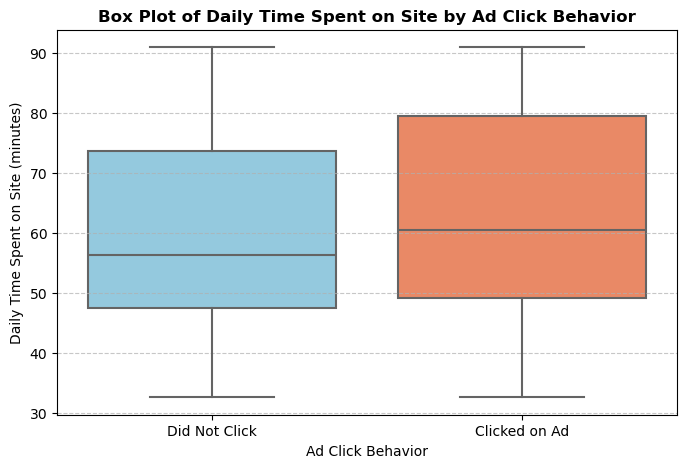

In [172]:
# Problem 14: Box Plot for Daily Time Spent on Site

df["Ad Status"] = df["Clicked on Ad"].map({0: "Did Not Click", 1: "Clicked on Ad"})
plt.figure(figsize=(8, 5))
sns.boxplot(
    x="Ad Status",
    y="Daily Time Spent on Site",
    data=df,
    palette=["skyblue", "coral"]
)
plt.title("Box Plot of Daily Time Spent on Site by Ad Click Behavior", fontsize=12, fontweight='bold')
plt.xlabel("Ad Click Behavior", fontsize=10)
plt.ylabel("Daily Time Spent on Site (minutes)", fontsize=10)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()

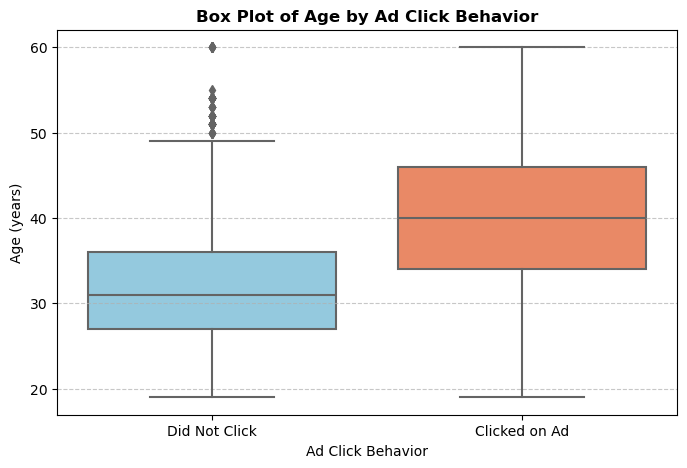

In [174]:
# Problem 15: Box Plot for Age

df["Ad Status"] = df["Clicked on Ad"].map({0: "Did Not Click", 1: "Clicked on Ad"})
plt.figure(figsize=(8, 5))
sns.boxplot(
    x="Ad Status",
    y="Age",
    data=df,
    palette=["skyblue", "coral"]
)
plt.title("Box Plot of Age by Ad Click Behavior", fontsize=12, fontweight='bold')
plt.xlabel("Ad Click Behavior", fontsize=10)
plt.ylabel("Age (years)", fontsize=10)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()

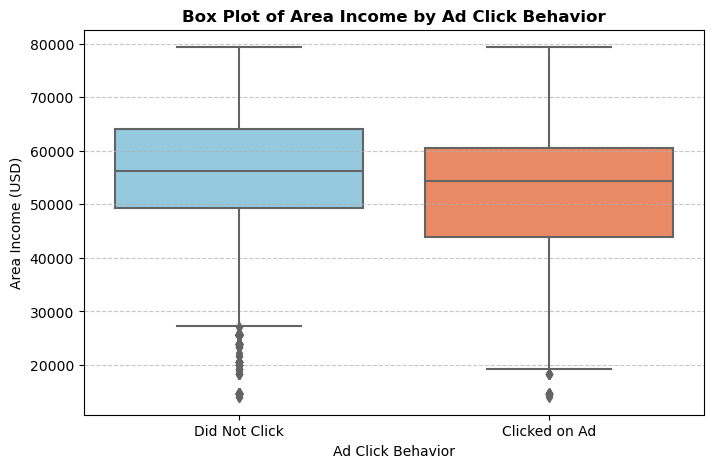

In [176]:
# Problem 16: Box Plot for Area Income

df["Ad Status"] = df["Clicked on Ad"].map({0: "Did Not Click", 1: "Clicked on Ad"})
plt.figure(figsize=(8, 5))
sns.boxplot(
    x="Ad Status",
    y="Area Income",
    data=df,
    palette=["skyblue", "coral"]
)
plt.title("Box Plot of Area Income by Ad Click Behavior", fontsize=12, fontweight='bold')
plt.xlabel("Ad Click Behavior", fontsize=10)
plt.ylabel("Area Income (USD)", fontsize=10)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()

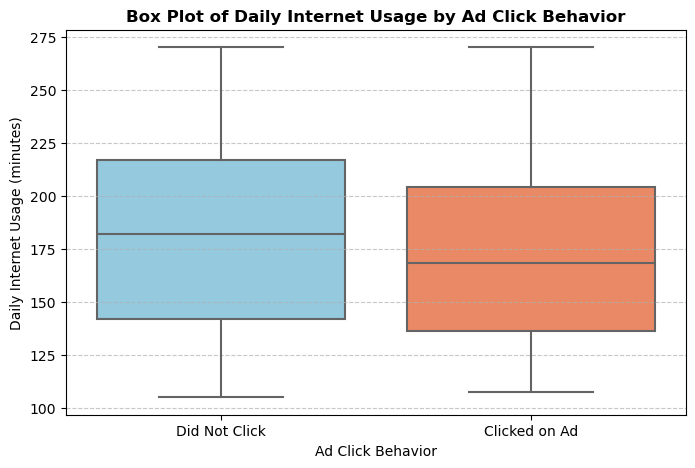

In [178]:
# Problem 17: Box Plot for Daily Internet Usage

df["Ad Status"] = df["Clicked on Ad"].map({0: "Did Not Click", 1: "Clicked on Ad"})
plt.figure(figsize=(8, 5))
sns.boxplot(
    x="Ad Status",
    y="Daily Internet Usage",
    data=df,
    palette=["skyblue", "coral"]
)
plt.title("Box Plot of Daily Internet Usage by Ad Click Behavior", fontsize=12, fontweight='bold')
plt.xlabel("Ad Click Behavior", fontsize=10)
plt.ylabel("Daily Internet Usage (minutes)", fontsize=10)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()

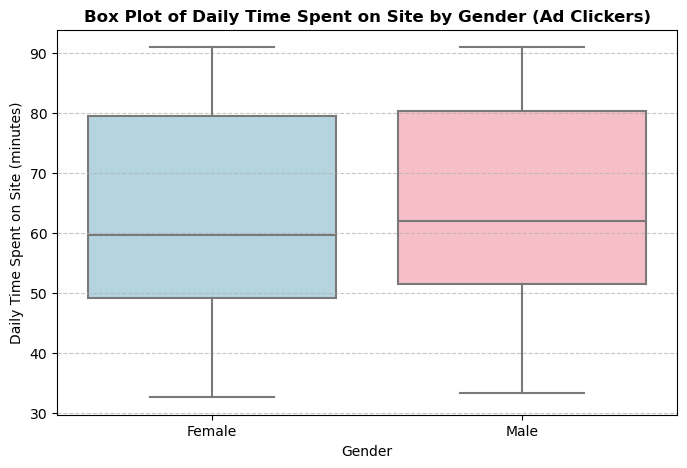

In [180]:
# Problem 18: Box Plot for Gender

df["Ad Status"] = df["Clicked on Ad"].map({0: "Did Not Click", 1: "Clicked on Ad"})
df_clicked = df[df["Ad Status"] == "Clicked on Ad"]
plt.figure(figsize=(8, 5))
sns.boxplot(
    x="Gender",
    y="Daily Time Spent on Site",
    data=df_clicked,
    palette=["lightblue", "lightpink"]
)
plt.title("Box Plot of Daily Time Spent on Site by Gender (Ad Clickers)", fontsize=12, fontweight='bold')
plt.xlabel("Gender", fontsize=10)
plt.ylabel("Daily Time Spent on Site (minutes)", fontsize=10)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()

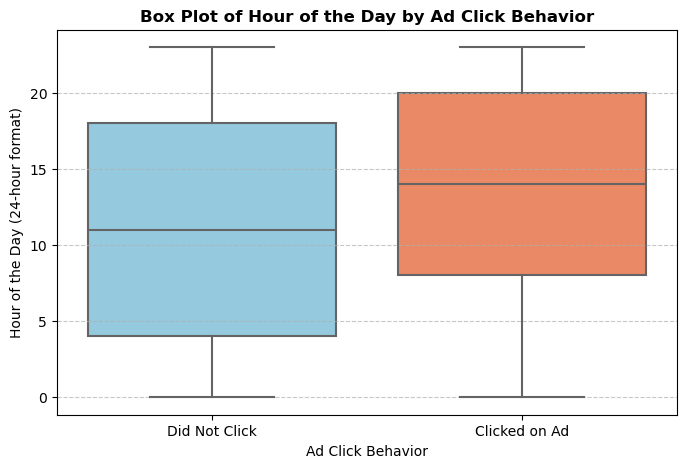

In [182]:
# Problem 19: Box Plot for Timestamp Analysis

df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df["Hour of Day"] = df["Timestamp"].dt.hour
df["Ad Status"] = df["Clicked on Ad"].map({0: "Did Not Click", 1: "Clicked on Ad"})
plt.figure(figsize=(8, 5))
sns.boxplot(
    x="Ad Status",
    y="Hour of Day",
    data=df,
    palette=["skyblue", "coral"]
)
plt.title("Box Plot of Hour of the Day by Ad Click Behavior", fontsize=12, fontweight='bold')
plt.xlabel("Ad Click Behavior", fontsize=10)
plt.ylabel("Hour of the Day (24-hour format)", fontsize=10)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()

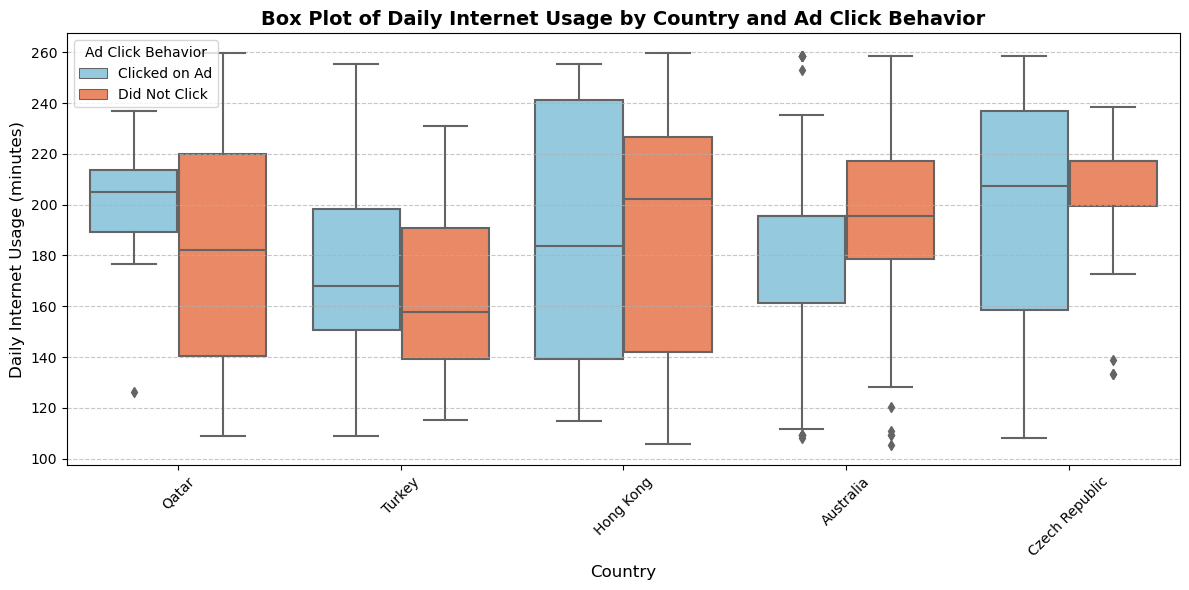

In [184]:
# Problem 20: Box Plot for Country

df["Ad Status"] = df["Clicked on Ad"].map({0: "Did Not Click", 1: "Clicked on Ad"})
top_countries = df["Country"].value_counts().head(5).index
df_top_countries = df[df["Country"].isin(top_countries)]
plt.figure(figsize=(12, 6))
sns.boxplot(
    x="Country",
    y="Daily Internet Usage",
    hue="Ad Status",
    data=df_top_countries,
    palette=["skyblue", "coral"]
)
plt.title("Box Plot of Daily Internet Usage by Country and Ad Click Behavior", fontsize=14, fontweight='bold')
plt.xlabel("Country", fontsize=12)
plt.ylabel("Daily Internet Usage (minutes)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.legend(title="Ad Click Behavior")
plt.tight_layout()
plt.show()